####(10)(11)

In [3]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from IPython.display import display
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
%matplotlib inline

# (10)
df = pd.read_csv('defraconsumption.csv',sep = ";")

# (11)
X_row = df.as_matrix(columns = df.columns[1:])
#print X
'''
X_scaled = preprocessing.scale(X)
print X_scaled
'''
scaler = preprocessing.StandardScaler(with_mean=True, with_std=True).fit(X_row)
X = scaler.transform(X_row)
display(df)
'''
plt.figure()
plt.scatter(X[:, 0], X[:, 1], s=50, alpha=1)  #s: size of points
plt.show()

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], s = 50, alpha = 0.7)
ax.set_xlabel('England')
ax.set_ylabel('Wales')
ax.set_zlabel('Scotland')
plt.show()
'''

F:\Programming\Python\Anaconda2\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
F:\Programming\Python\Anaconda2\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,Unnamed: 0,England,Wales,Scotland,N Ireland
0,Cheese,105,103,103,66
1,Carcass meat,245,227,242,267
2,Other meat,685,803,750,586
3,Fish,147,160,122,93
4,Fats and oils,193,235,184,209
5,Sugars,156,175,147,139
6,Fresh potatoes,720,874,566,1033
7,Fresh Veg,253,265,171,143
8,Other Veg,488,570,418,355
9,Processed potatoes,198,203,220,187


"\nplt.figure()\nplt.scatter(X[:, 0], X[:, 1], s=50, alpha=1)  #s: size of points\nplt.show()\n\nfrom mpl_toolkits.mplot3d import Axes3D\nfig = plt.figure(figsize=(8,8))\nax = plt.axes(projection='3d')\nax.scatter(X[:, 0], X[:, 1], X[:, 2], s = 50, alpha = 0.7)\nax.set_xlabel('England')\nax.set_ylabel('Wales')\nax.set_zlabel('Scotland')\nplt.show()\n"

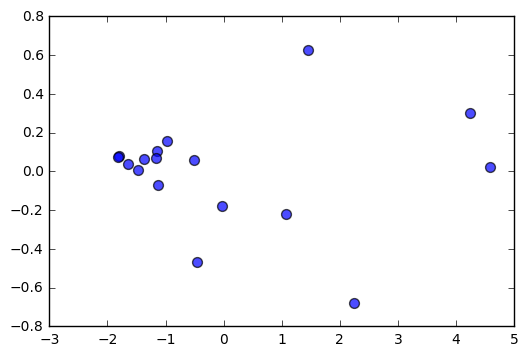

[[-1.64387422  0.03813   ]
 [-0.9792373   0.15958186]
 [ 1.0645533  -0.21917462]
 [-1.48261467  0.00875623]
 [-1.15527867  0.1074057 ]
 [-1.37940507  0.06478938]
 [ 1.45440669  0.62921477]
 [-1.13694557 -0.07002631]
 [-0.03102173 -0.18059074]
 [-1.16885461  0.06968157]
 [-0.51789417  0.05855351]
 [ 2.23701103 -0.67834847]
 [ 4.58101272  0.02224513]
 [-1.80758847  0.08109728]
 [ 4.23881128  0.30072904]
 [-0.45556594 -0.46623859]
 [-1.8175146   0.07419429]]


In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2, copy = True)
pca.fit(X)
X_pca = pca.transform(X)
plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=50, alpha=0.7)  #s: size of points
plt.show()
print X_pca

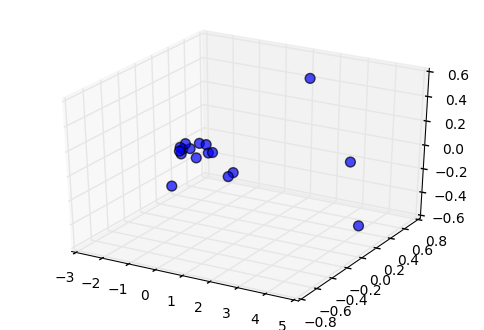

In [11]:
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components = 3, copy = True)
pca.fit(X)
X_pca = pca.transform(X)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], s = 50, alpha = 0.7)
plt.show()

[[ 17.          16.84112428  16.74359627  16.10953096]
 [ 16.84112428  17.          16.39006584  15.93003321]
 [ 16.74359627  16.39006584  17.          15.9926114 ]
 [ 16.10953096  15.93003321  15.9926114   17.        ]]
[[  6.60091099e+01   3.71924713e-15   7.10542736e-15  -3.55271368e-15]
 [  1.74082753e-14   6.66882852e-02   1.02045108e-15  -4.96401965e-16]
 [ -7.10542736e-15   1.03042574e-15   1.31302950e+00   6.93889390e-17]
 [ -2.58092159e-14   3.57960189e-15  -2.50494070e-15   6.11172331e-01]]
[(66.009109885239269, array([ 0.50526231,  0.50123046,  0.50094821,  0.49247225])), (1.3130294984639448, array([-0.27858192, -0.34368879, -0.22784545,  0.86738491])), (0.61117233111597502, array([-0.06276508, -0.63456169,  0.76712452, -0.07008552])), (0.066688285180832363, array([ 0.814348  , -0.4774699 , -0.32963209, -0.01423082]))]


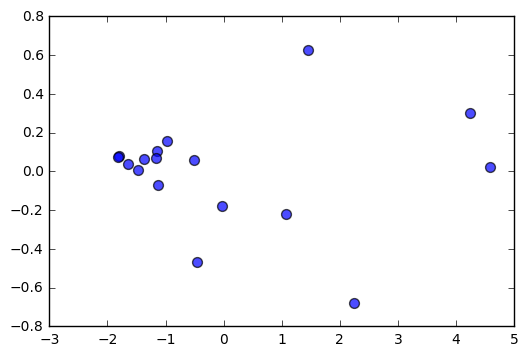

In [24]:
# (a)
X_cov = np.dot(X.T, X)
#print X_cov
eig_val, eig_vec = np.linalg.eig(X_cov)
# diagolize
# 对角化后的结果，应该为0的位置很接近但不是0，怎么解决？
diag = np.dot(np.dot(np.linalg.inv(eig_vec),X_cov),eig_vec)
#print diag
# 
eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(X.shape[1])]
# Sort eig_vec based on eig_val from highest to lowest
eig_pairs.sort(reverse=True)
#print eig_pairs
# Select k eig_val as the principle components 
k = 2
component = np.array([ele[1] for ele in eig_pairs[:k]])
X_new = np.dot(X, component.T)
plt.figure()
plt.scatter(X_new[:, 0], X_new[:, 1], s=50, alpha=0.7)  
plt.show()

[[-0.85710901 -0.23428967]
 [-0.40207895 -0.18174278]
 [ 0.3755108   0.26093385]
 [-0.79423148 -0.23111466]
 [-0.57629654 -0.26850324]
 [-0.70925802 -0.24465322]
 [ 1.12834432 -0.46806465]
 [-0.64307601 -0.17335903]
 [-0.15668226 -0.01147747]
 [-0.58425599 -0.16565115]
 [-0.22492525 -0.09228107]
 [ 0.83092901  0.67983382]
 [ 2.48499494  0.62468387]
 [-0.93388153 -0.31631705]
 [ 2.61020785  0.90272724]
 [-0.60717556  0.21345313]
 [-0.94101634 -0.29417792]]
[[-1.64387422  0.03813   ]
 [-0.9792373   0.15958186]
 [ 1.0645533  -0.21917462]
 [-1.48261467  0.00875623]
 [-1.15527867  0.1074057 ]
 [-1.37940507  0.06478938]
 [ 1.45440669  0.62921477]
 [-1.13694557 -0.07002631]
 [-0.03102173 -0.18059074]
 [-1.16885461  0.06968157]
 [-0.51789417  0.05855351]
 [ 2.23701103 -0.67834847]
 [ 4.58101272  0.02224513]
 [-1.80758847  0.08109728]
 [ 4.23881128  0.30072904]
 [-0.45556594 -0.46623859]
 [-1.8175146   0.07419429]]


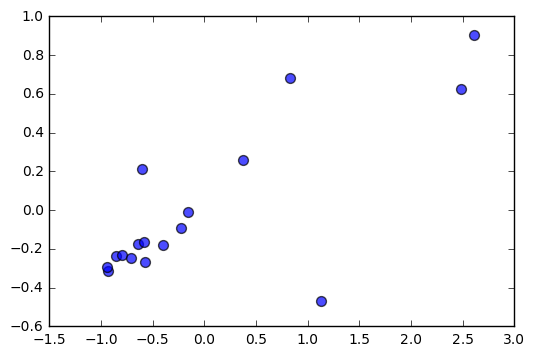

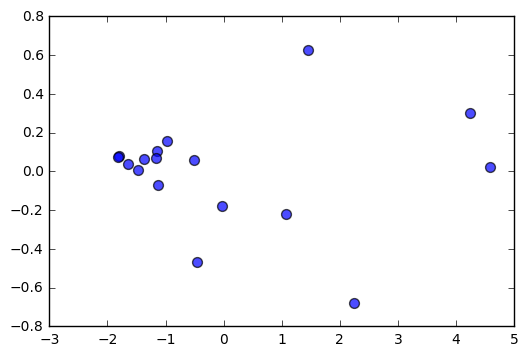

In [37]:
U,s,V = np.linalg.svd(X, full_matrices=1,compute_uv=1)
k = 2
U_k = np.array((U.T[:k]).T)
s_k = np.zeros((k,k))
for j in range(0,k):
    s_k[j][j] = s[j]
#s_k = np.array((s.T[:k]).T)
V_k = np.array((V.T[:k]).T)
re1 = np.dot(X,V_k)
print re1
re2 = np.dot(U_k,s_k)
print re2
plt.figure()
plt.scatter(re1[:, 0], re1[:, 1], s=50, alpha=0.7)  
plt.show()
plt.figure()
plt.scatter(re2[:, 0], re2[:, 1], s=50, alpha=0.7)  
plt.show()

# Skills

In [6]:
print X[:, 0]  # The first column of X
df

[ 105  245  685  147  193  156  720  253  488  198  360 1102 1472   57 1374
  375   54]


,Unnamed: 0,England,Wales,Scotland,N Ireland
0,Cheese,105,103,103,66
1,Carcass meat,245,227,242,267
2,Other meat,685,803,750,586
3,Fish,147,160,122,93
4,Fats and oils,193,235,184,209
5,Sugars,156,175,147,139
6,Fresh potatoes,720,874,566,1033
7,Fresh Veg,253,265,171,143
8,Other Veg,488,570,418,355
9,Processed potatoes,198,203,220,187


### plot & subplot

##### plot

In [ ]:
v = np.array([1, 3, 2, 4])
x = np.array([0, 1, 2, 3])

plt.figure()
plt.plot(x,v, 'rv--', label='v(x)')
plt.legend(loc='lower right')
plt.xlabel('x')
plt.ylabel('v')
plt.title('Mon titre')
plt.xlim([-1, 4])
plt.ylim([0, 5])
plt.show()
plt.savefig('toto.png')

##### subplot

In [ ]:
fig = plt.figure(0)
sub1 = fig.add_subplot(121)
sub1.scatter(X[:, 0], X[:, 1], s=98, alpha=1, c=my_orange, zorder=1)
sub1.get_yaxis().set_ticks([])
sub1.get_xaxis().set_ticks([])
sub1.set_ylim([-3., 3.])
sub1.set_xlim([-3., 3.])
sub1.set_aspect('equal')
sub1.set_xlabel(u'Data')
plt.show()

##### para. in scatter
scatter(x, y, s, c, marker, cmap, norm, vmin, vmax, alpha, linewidths, verts, hold, **kwargs)
http://matplotlib.org/api/pyplot_api.html

In [ ]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], s=50, alpha=1, c="b", zorder=1)  
#s: size of points
#alpha: transparency
#zorder: the line with higher zorder will cover the lower
plt.show()